In [1]:
# Bhagawat Chapagain
# 20014827
# Homework 10 - SOM


from minisom import MiniSom

# from sklearn.datasets import load_df
from sklearn.preprocessing import MinMaxScaler

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'minisom'

In [ ]:
# df = load_df()
# features = df.data
# labels = df.target
# type(df)
# # print(f'{features[0]} ')

df = pd.read_csv('./wisc_bc_ContinuousVar.csv')
df.replace('########', np.nan, inplace=True)
df = df.dropna() # drops NaN values 

#print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

# Splitting the dataset
features = df.drop(columns = ['diagnosis', 'id'])  # features
labels = df['diagnosis']  # target variable
labels = labels.map({'M': 0, 'B': 1})
df.head()
target_names = labels.values
# target.head()

In [ ]:
sc = MinMaxScaler(feature_range = (0,1))
features = sc.fit_transform(features)

In [ ]:
sigma = 1.5
lr = 0.5
n_features = features.shape[1]
n_samples = features.shape[0]
print(f"number of samples: {n_samples}")

map_size = 5 * math.sqrt(n_samples)
map_height = map_width = math.ceil(math.sqrt(map_size))


print(f'(map_height, map_width) = ({map_height}, {map_width})')
print(f'Number of features: {n_features}')

number of samples: 569
(map_height, map_width) = (11, 11)
Number of features: 30


In [ ]:
som = MiniSom(x=map_height, y=map_width, input_len=n_features, sigma=sigma, learning_rate=lr, 
              neighborhood_function='gaussian', random_seed=123)
 
som.pca_weights_init(features)
som.train(data=features, num_iteration=1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.32170372386453644


/home/bc/.local/lib/python3.11/site-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


In [ ]:
# # print('-------------\nDistance Map\n------------')
# print(f'Shape: {som.distance_map().shape}')
# print(f'First Line: {som.distance_map().T}')

In [ ]:
# frequencies = som.activation_response(features)
# print(f'Frequencies:\n {np.array(frequencies, np.uint)}')
# print(frequencies)

In [ ]:
# print(df.target_names)

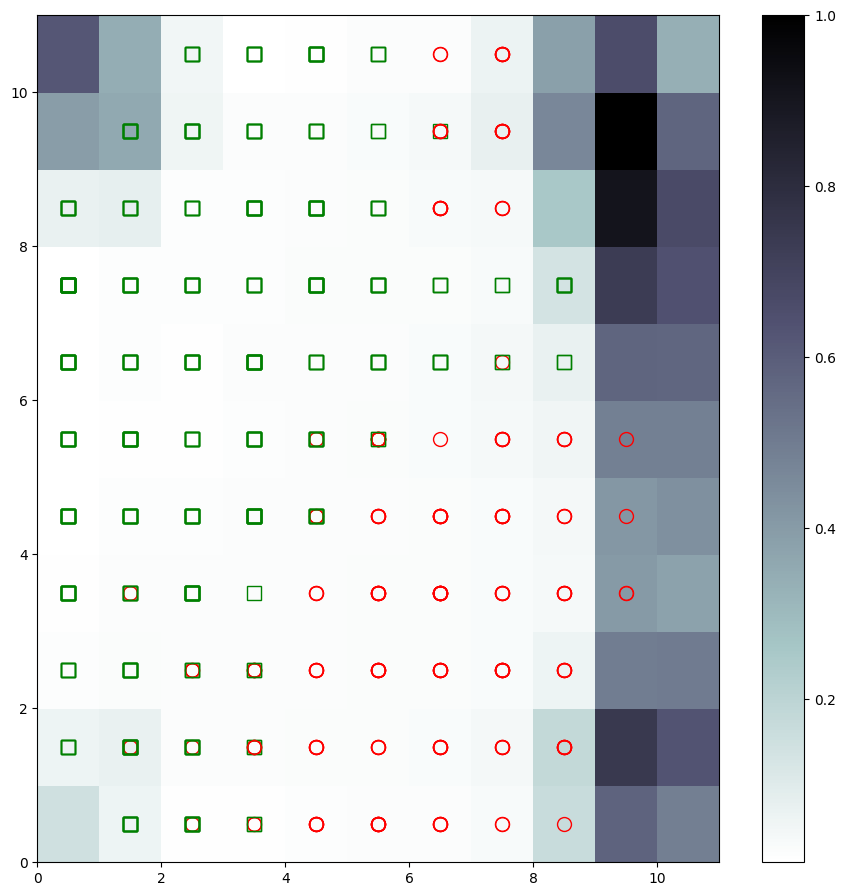

In [ ]:
plt.figure(figsize=(map_height, map_width))

# plot U-matrix
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

# plot markers
markers = ['o', 's', '^']   # 'setosa', 'versicolor' 'virginica'
colors = ['r', 'g', 'b']
w0=[] 
w1=[]
lbl=[]
mkrs=[]

for feature, label in zip(features, labels):
    w = som.winner(feature)  # Get the winning neuron coordinates
    plt.plot(w[0] + 0.5, w[1] + 0.5, 
             markers[label], markeredgecolor=colors[label], 
             markerfacecolor='None', markersize=10, markeredgewidth=1)


plt.show()